<a href="https://colab.research.google.com/github/ht182748678/Green-plate/blob/main/Data_processing%20for%20restaurant%20checkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Authentication**

Everytime before you make connection to Google Cloud via API, you need to run the below code to grant access to Google Cloud services.

In [1]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

# **Load data into BigQuery**

The following codes help you load data from bucket to your BigQuery.

### Step 1: Create a new dataset in your BigQuery to store your project data

In [6]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [20]:
def create_dataset(project_id, dataset_id, location="US"):
    client = bigquery.Client(project=project_id)
    dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = location

    created_dataset = client.create_dataset(dataset, timeout=30)  # Waits 30 seconds
    print("Dataset {} created.".format(created_dataset.dataset_id))

# Usage
create_dataset('tong2-423213', 'NIHAO') # Replace 'your-project-id' with your Google Cloud project ID and 'your-new-datatset-name' with your desired dataset name

Dataset NIHAO created.


### Step 2: Load data into the dataset you just created in BigQuery

In [ ]:
# Load the restaurant data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "tong-421311"
dataset_name = "bdao_ima_4d"
table_name = "restaurant_data"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_data.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: tong-421311.bdao_ima_4d.restaurant_data


In [ ]:
# Load the restaurant tips data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "tong-421311"
dataset_name = "bdao_ima_4d"
table_name = "restaurant_tips"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_tips.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: tong-421311.bdao_ima_4d.restaurant_tips


In [23]:
# Load the data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
# (optional) you could change the table name with a new name but not a problem not to change
project_id = "tong2-423213"
dataset_name = "NIHAO"
table_name = "restaurant_checkin"
bucket_name = "yelp-data-bdao" # don't make changes here
blob_name = "restaurant_checkin.csv" # don't make changes here

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.CSV

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: tong2-423213.NIHAO.restaurant_checkin


Until here, you have successfully loaded all data into your data warehouse (BigQuery) in Google Cloud.

# **Query data from BigQuery and do analysis**

Now that the data is stored in BigQuery, you can make connection to BigQuery and extract data you want.

### Query data from restaurant data file


In [24]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "tong2-423213"
dataset_name = "NIHAO"
table_name = "restaurant_checkin" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [25]:
# Query all data from the table
query = f"""
    SELECT business_id, total_number_of_checkin, year, month, day, hour
    FROM `{project_id}.{dataset_name}.{table_name}`

"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()
print(restaurant_df.shape)

(8515582, 6)


In [10]:
restaurant_df

,business_id,total_number_of_checkin,year,month,day,hour
0,CPFKi2lZJazP6IdtCdDDyg,3329,2022,1,1,23
1,ZswHHBmGyk2FmmSiRf6GHw,3,2022,1,15,20
2,ijnHrV9zqytI_XGe1K4sPA,4,2022,1,16,17
3,v_AbyvMdKUi_ac4A8nkG-A,772,2022,1,1,21
4,EplLH353uir93Jo_Py3xww,7,2022,1,8,23
...,...,...,...,...,...,...
8515577,iJJdgwK4wrX8-PjKZzOEvQ,1023,2021,6,30,17
8515578,WxB8498ejPtHE7wFa89_fA,3583,2021,6,27,23
8515579,VQcCL9PiNL_wkGf-uF3fjg,28927,2021,5,12,19
8515580,VQcCL9PiNL_wkGf-uF3fjg,28927,2021,5,25,0






 # Data processing and analysis

##checking the missing data

In [26]:
restaurant_df.isnull().sum()

business_id                0
total_number_of_checkin    0
year                       0
month                      0
day                        0
hour                       0
dtype: int64

In [27]:
df = restaurant_df.dropna(axis=0)

In [28]:
df.shape

(8515582, 6)

##Data checking


In [30]:
df.shape

(8515582, 6)

In [31]:
df.dtypes

business_id                object
total_number_of_checkin     Int64
year                        Int64
month                       Int64
day                         Int64
hour                        Int64
dtype: object

In [32]:
df

,business_id,total_number_of_checkin,year,month,day,hour
0,DWA7JiOvWZtTREq6-KA5jw,7,2022,1,1,2
1,WIY7S0HgG-pnHPARn8gFkg,520,2022,1,18,19
2,koeubKPpi6ax4FDh7_zcWg,11,2022,1,6,13
3,OcWuxEqm_5gTz7oPSHB6Jw,16,2022,1,5,3
4,JrHqYDwfPeq-jVRGQiRXLQ,23,2022,1,2,19
...,...,...,...,...,...,...
8515577,PlaECqs3oPBRo47p85zkzw,2045,2021,9,19,15
8515578,IhrTLL6az3q192ik4P05IQ,254,2021,5,8,22
8515579,yT3Qs8rz82wqhKFlfWr1Lg,510,2021,3,22,1
8515580,BaWVwChTW_MqkKru_WZp3g,766,2021,8,15,1


##Exploratory data analysis (EDA)

In [33]:
df.describe()

,total_number_of_checkin,year,month,day,hour
count,8515582.0,8515582.0,8515582.0,8515582.0,8515582.0
mean,1480.546202,2015.401235,6.47935,15.770742,13.429553
std,3754.735705,2.751444,3.401619,8.807844,8.421359
min,1.0,2009.0,1.0,1.0,0.0
25%,216.0,2013.0,4.0,8.0,3.0
50%,559.0,2015.0,6.0,16.0,17.0
75%,1347.0,2017.0,9.0,23.0,20.0
max,40109.0,2022.0,12.0,31.0,23.0


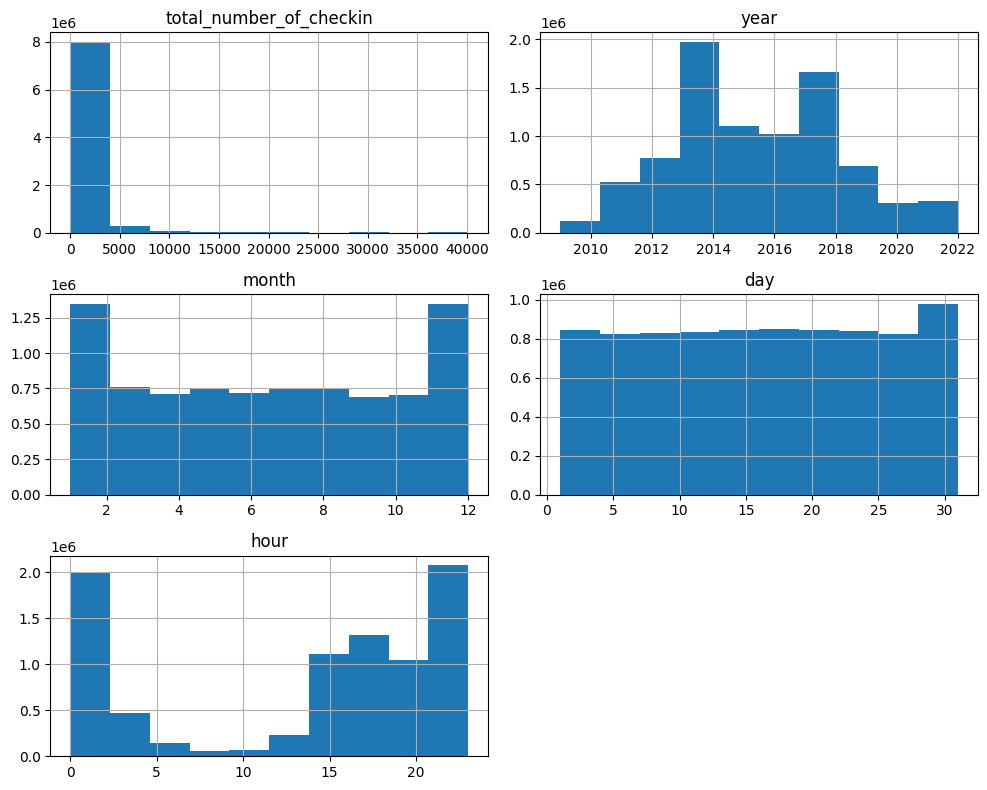

In [36]:
import matplotlib.pyplot as plt
# Create subplots for each column
df.drop(['business_id'],axis = 1).hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

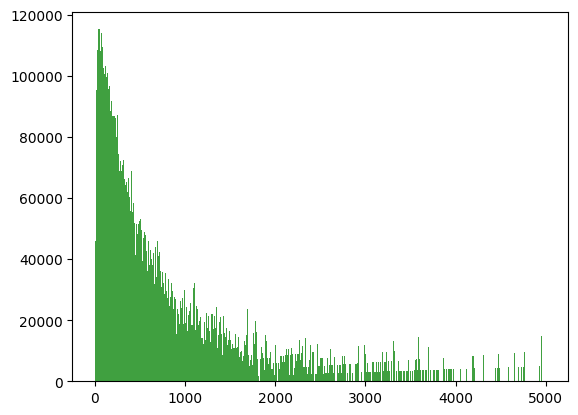

In [44]:
data = df['total_number_of_checkin']
plt.hist(data, bins=500, range=(0, 5000), color='green', alpha=0.75)
plt.show()

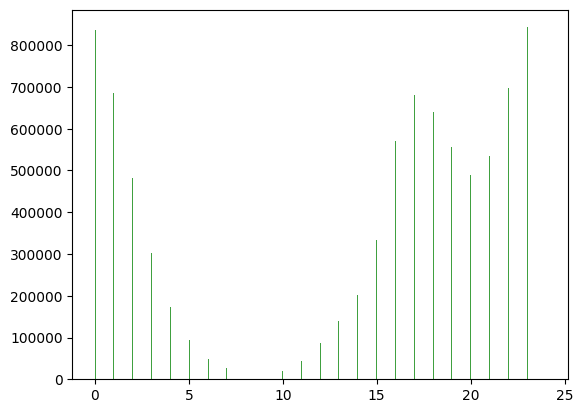

In [45]:
data = df['hour']
plt.hist(data, bins=500, range=(0, 24), color='green', alpha=0.75)
plt.show()

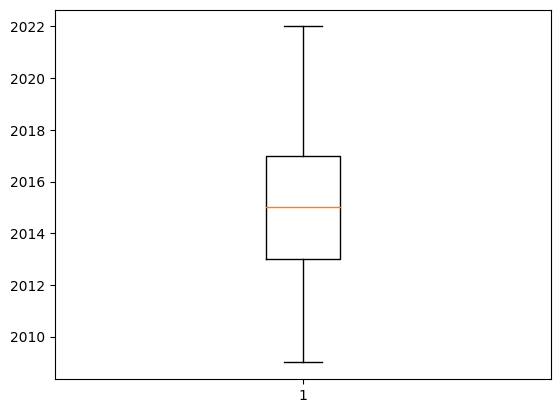

In [38]:
data_to_plot = [df['year']]
plt.boxplot(data_to_plot)
plt.show()


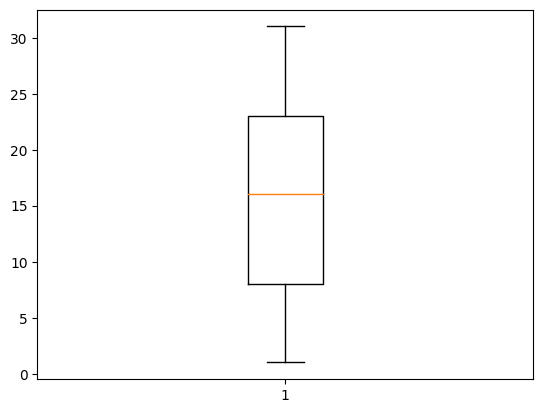

In [40]:
data_to_plot = [df['day']]
plt.boxplot(data_to_plot)
plt.show()


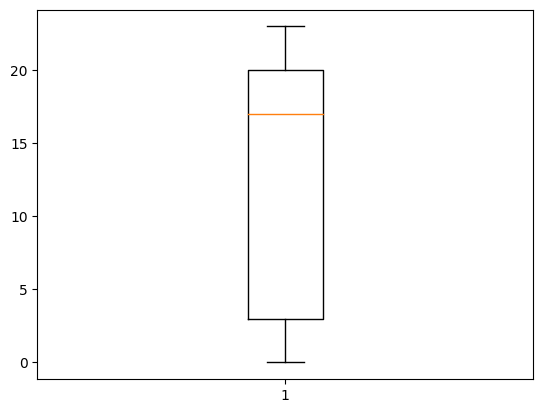

In [42]:
data_to_plot = [df['hour']]
plt.boxplot(data_to_plot)
plt.show()


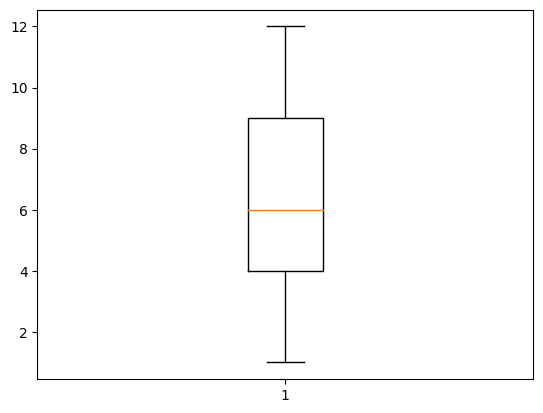

In [43]:
data_to_plot = [df['month']]
plt.boxplot(data_to_plot)
plt.show()


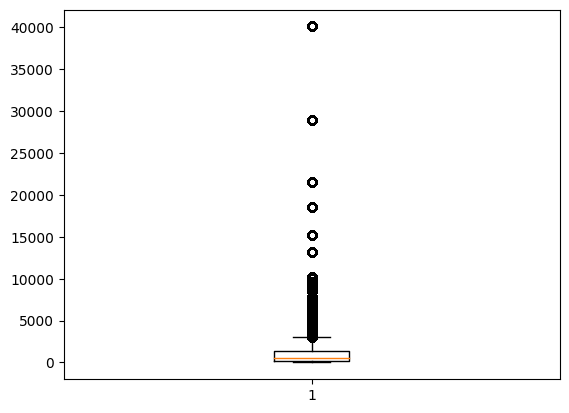

In [41]:
data_to_plot = [df['total_number_of_checkin']]
plt.boxplot(data_to_plot)
plt.show()


# **Store the transformed data back to BigQuery for visualisation**

We know data visualisation requires clean data and if we read data directly in Tableau it might crash because the data size is large and the data might messy.

You could consider using Python to clean and process your data and then you can store the transformed data table back to BigQuery and then you can make connections to the transformed table in Tableau to do visualisation.

## Query data from restaurant checkin data file

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "tong-421311"
dataset_name = "test1"
table_name = "restaurant_checkin" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT business_id, total_number_of_checkin, year, month, day, hour
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

checkin_df = query_job.to_dataframe()
checkin_df.head()

,business_id,total_number_of_checkin,year,month,day,hour
0,QqvMMaeNJqaEJihkhdYiAQ,726,2013,2,1,1
1,ZIwn-7d3JOBEmUb7ELMr7A,1245,2020,2,1,21
2,y1Z9tymuBGVDZnYZoLk-2Q,734,2017,1,1,19
3,T9I4G6Or3sAbyYmB7c23hw,234,2018,10,1,17
4,6o3Xj4Lxa2XcaHuCblCc3g,1007,2016,1,1,1


## Joining tables through SQL query (example)

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "tong-421311"
dataset_name = "cleaned_restaurant_data"
table_1 = "df"
table_2 = "df1"


bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Adding restaurant information to checkin data by joining 'restaurant_checkin' and 'restaurant_data'
query = f"""
    SELECT r.business_id, r.name, r.city, r.state, r.stars, r.attributes,c.business_id, c.total_number_of_checkin, c.year, c.month, c.day, c.hour
    FROM `{project_id}.{dataset_name}.{table_2}` AS c
    JOIN `{project_id}.{dataset_name}.{table_1}` AS r on r.business_id = c.business_id

"""

query_job = bigquery_client.query(query)
results = query_job.result()

join_df = query_job.to_dataframe()
join_df.head()

,business_id,name,city,state,stars,attributes,business_id_1,total_number_of_checkin,year,month,day,hour
0,QAMJIJQ7SMO-C5xUN37iIw,Sweet Spot Cafe,Saint Ann,MO,4.5,"{'GoodForKids': 'True', 'Alcohol': ""'none'"", '...",QAMJIJQ7SMO-C5xUN37iIw,216,2019,10,13,13
1,QpK7QS5rluvEGeNB8LM_UA,Ravanelli's,Collinsville,IL,3.5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",QpK7QS5rluvEGeNB8LM_UA,216,2019,7,22,22
2,QpK7QS5rluvEGeNB8LM_UA,Ravanelli's,Collinsville,IL,3.5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",QpK7QS5rluvEGeNB8LM_UA,216,2021,9,26,17
3,hVi4_rFTj0fsbfxa4X4OAA,Costa's Restaurant,Tarpon Springs,FL,3.5,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",hVi4_rFTj0fsbfxa4X4OAA,216,2018,9,2,16
4,AJJVDErw_HuO2XMdMPir8Q,Seoul Taco,Chesterfield,MO,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",AJJVDErw_HuO2XMdMPir8Q,217,2021,3,27,18


When joining, be careful of one-to-many. In restaurant data there are information for each restaurant, but in checkin and tips data there are multiple records for one single restaurants. Thus, it is better to use checkin or tips data to join restaurant data. If you do the opposite, you might have error and query incomplete data.

If you are just not familiar with SQL, you can just query dataset one by one and then use Python to merge or join them if you need.

Since the query data is converted into dataframe, you can easily use Python to do analysis or modelling. This is up to you how you would do.

In [ ]:
# First, ensure pandas-gbq is installed
!pip install pandas-gbq

# Specify the destination table and dataset in BigQuery
# Replace 'your_dataset_name' with your dataset name where you are sending the new table to
# Replace 'new_table_name' with a name you would like to give to your table
# Replace 'your-project-id' with your project id
destination_table = 'cleaned_restaurant_data.df'
project_id = 'tong-421311'

# Use the to_gbq function to upload the DataFrame (after data processing) to BigQuery
df.to_gbq(destination_table, project_id=project_id, if_exists='replace', progress_bar=True)

100%|██████████| 1/1 [00:00<00:00, 6452.78it/s]


By running the above code, you should be able to see there is a new table uploaded to BigQuery under your dataset.